In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Context

In [2]:
# Load data
data = pd.read_csv("train.csv")

# Data quality assessment

In [3]:
# Discover duplicated rows and show the number of them
duplicated_rows = data.loc[data.duplicated()]
print(duplicated_rows.shape[0])

# Delete fully duplicated rows if exist
unique_record = data.loc[~data.duplicated()]


0


In [4]:
# Discover size of data sample
n_rows, n_columns = unique_record.shape
print(n_rows, n_columns)

100000 12


In [5]:
# Check data types of data and number non-null values
unique_record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.9+ MB


In [6]:
# PassangerId has int64 data type, but it's more convinient have it as string
unique_record = unique_record.astype({"PassengerId": "object"})
# Check changes
unique_record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  object 
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 9.9+ MB


In [7]:
# Get lists of numeric and categorical column's names
numeric_cols = [col for col in unique_record.columns if unique_record[col].dtype in ["int64", "float64"]]
print("Numeric columns: ", numeric_cols)

categorical_cols = [col for col in unique_record.columns if unique_record[col].dtype in ["object"]]
print("Categorical columns: ", categorical_cols)

Numeric columns:  ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical columns:  ['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


## First look at the data

In [8]:
# Show first 5 rows of data
unique_record.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [9]:
# Show last 5 rows of data
unique_record.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
99995,99995,1,2,"Bell, Adele",female,62.0,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.0,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.0,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.0,0,1,458654,30.92,NaN,S
99999,99999,0,3,"Enciso, Tyler",male,55.0,0,0,458074,13.96,NaN,S


In [10]:
# Show 5 random rows of data
unique_record.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
92655,92655,0,2,"Haffey, Joseph",male,34.0,0,2,21285,8.01,NaN,S
61399,61399,1,3,"Scofield, Rachel",female,19.0,0,1,489862,13.91,NaN,S
48488,48488,1,1,"Hawke, Marissa",female,55.0,0,0,PC 311079,154.98,C21025,C
15075,15075,1,1,"Spencer, Marie",female,42.0,1,1,26691,32.28,B19882,C
19892,19892,1,1,"Brahm, Cynthia",female,40.0,1,1,26317,61.46,D11856,C


# Data exploration

In [11]:
# Get statictics for numerical columns
unique_record.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


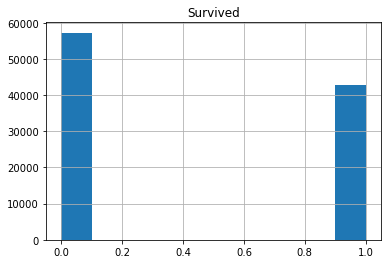

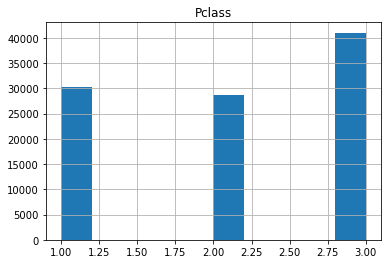

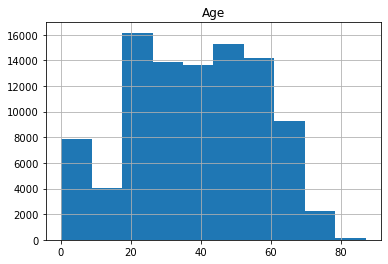

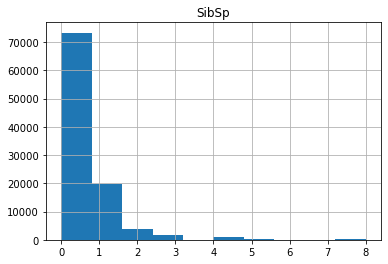

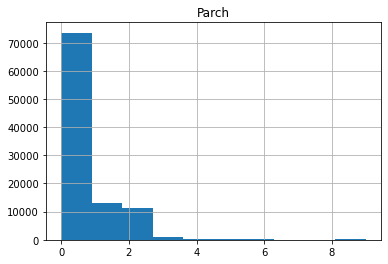

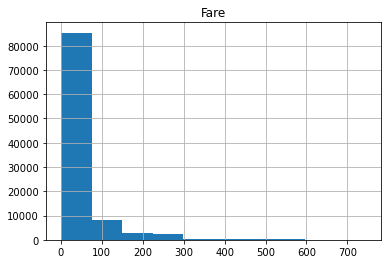

In [12]:
# Show histograms of numeric columns

for num_col in numeric_cols:
    df = unique_record[[num_col]]
    df.hist()

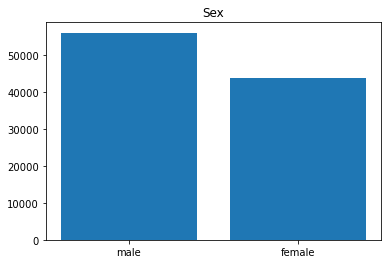

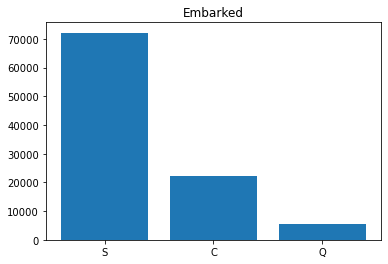

In [13]:
# Get plot with number of unique categorical values (only "Sex" and "Embarked" columns -
# the rest of categorical columns have too many unique values)

for cat_col in ['Sex', 'Embarked']:
    df = unique_record[cat_col].value_counts()
    plt.bar(df.index, df)
    plt.title(cat_col)
    plt.show()

<AxesSubplot:>

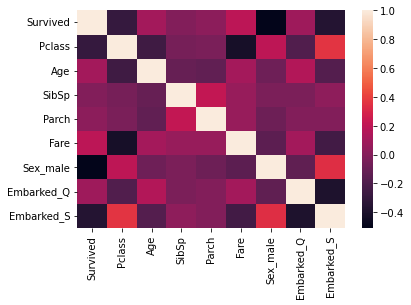

In [17]:
# Create dummy columns for Sex and Embarked columns
data = unique_record[numeric_cols + ['Sex', 'Embarked']]
data = pd.get_dummies(data, drop_first=True)

# Show heatmap for dataset
sns.heatmap(data.corr())

# Summary